In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
127,15745232,Male,26,32000,0
118,15642725,Male,40,59000,0
307,15733973,Female,47,113000,1
137,15687491,Male,30,107000,1
282,15750447,Male,37,70000,1


In [5]:
df = df.iloc[:,2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
48,30,135000,1
341,35,75000,0
367,46,88000,1
276,38,71000,0
194,28,89000,0


Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                   df['Purchased'],test_size=0.3,
                                                   random_state=0)

In [8]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

Standard Scaler 

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [14]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [16]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [19]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


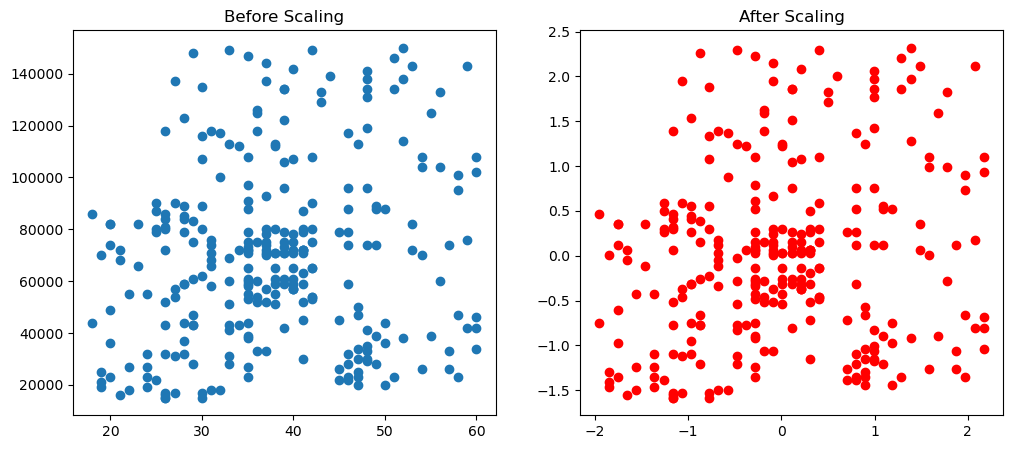

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

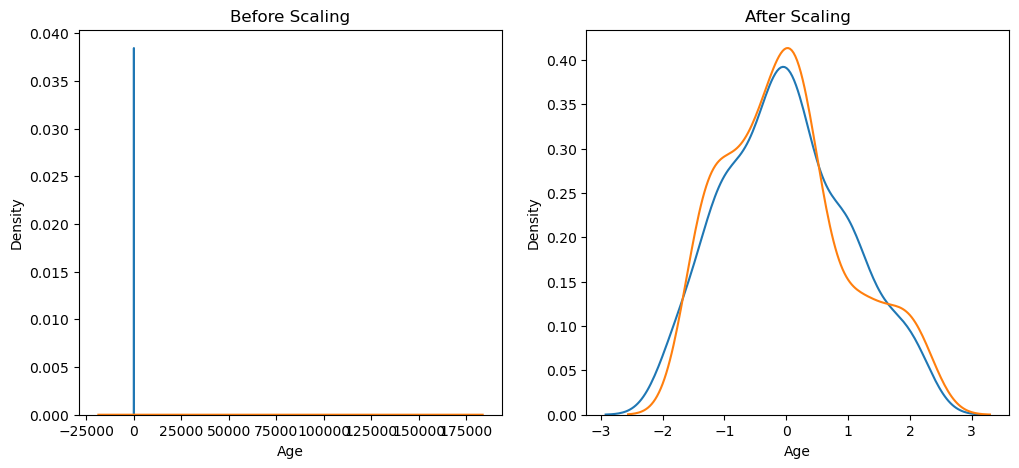

In [22]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)



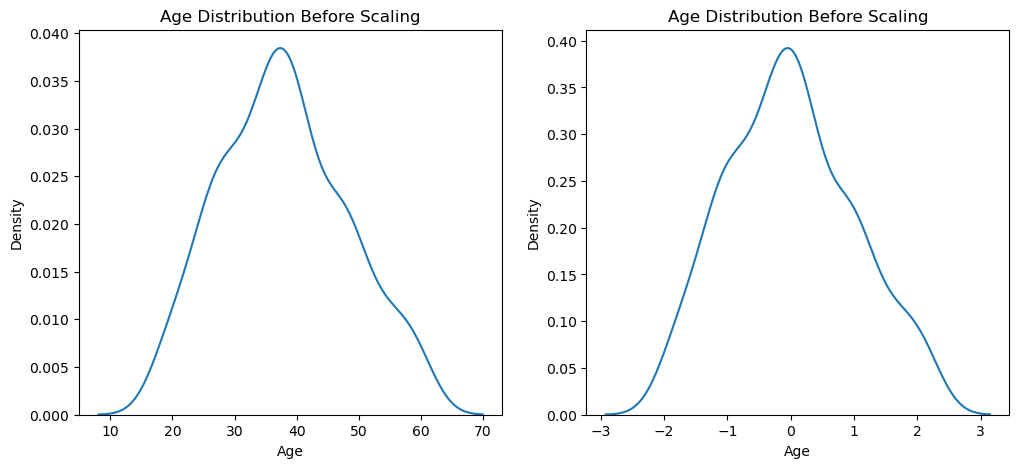

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before Scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#After scaling
ax2.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

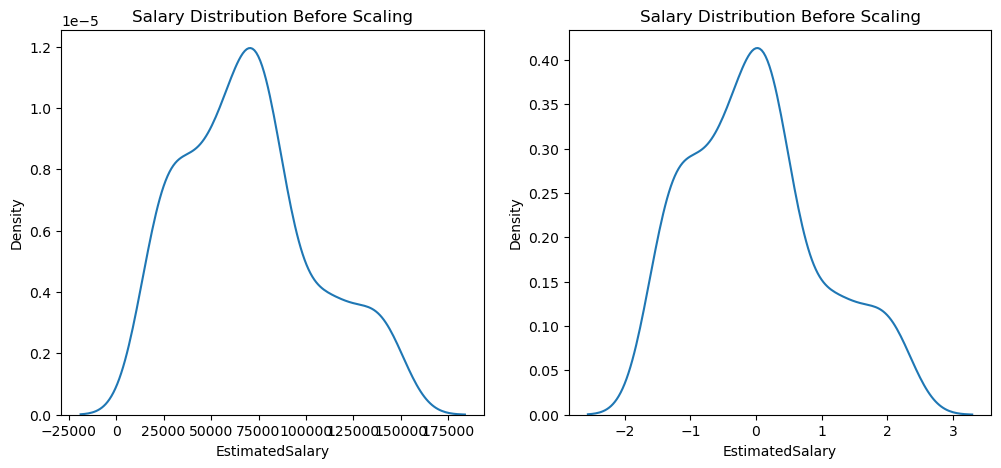

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before Scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#After scaling
ax2.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [30]:
y_pred = lr.predict(X_test) 
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
print("Atual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Atual 0.6583333333333333
Scaled 0.8666666666666667
